# Libraries

In [1]:
import pandas as pd
import numpy as np

# Reading and adding label


In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake["Label"] = 1
true["Label"] = 0

In [6]:
fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


# Combining 

In [8]:
frames = [fake, true]
news_dataset= pd.concat(frames)


# Showing Basics Statistics

In [9]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [10]:
news_dataset.describe()

,Label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [29]:
news_dataset.shape

(44898, 5)

# Shuffling data

In [ ]:
news_dataset = news_dataset .sample(frac = 1)


In [11]:
news_dataset.head()

,title,text,subject,date,Label
18012,BOMBSHELL REPORT: NSA OFFERED TO GIVE HILLARY’...,There s a lot going on in the Hillary Clinton/...,left-news,"Sep 5, 2017",1
14641,Russia names nine U.S.-backed news outlets lik...,MOSCOW (Reuters) - Russia on Thursday named ni...,worldnews,"November 16, 2017",0
3172,WATCH: Chuck Schumer CRUSHES Trump’s Tweeting...,Trump s team is working very hard to accommoda...,News,"January 3, 2017",1
10851,SHERIFF DAVID CLARKE Picked For Key Position I...,What a great pick by the Trump administration!...,politics,"May 17, 2017",1
23253,SHOUT! POLL: Do the ‘White Helmets’ Qualify fo...,21st Century Wire asks Currently throughout t...,Middle-east,"September 25, 2016",1


# Is the data balanced?

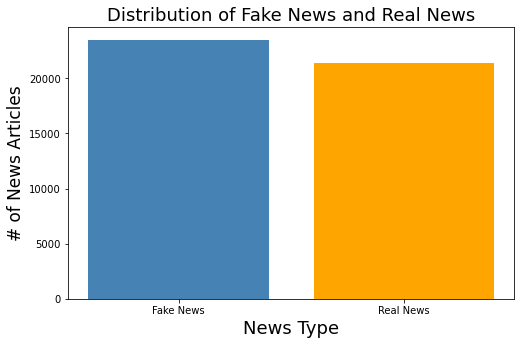

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar('Fake News', len(fake), color='steelblue')
plt.bar('Real News', len(true), color='orange')
plt.title('Distribution of Fake News and Real News', size=18)
plt.xlabel('News Type', size=18)
plt.ylabel('# of News Articles', size=17)
plt.savefig('Distribution of fake news and read news',dpi=300)

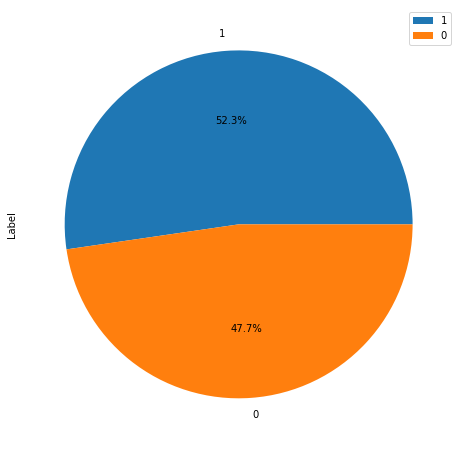

In [13]:
news_dataset["Label"].value_counts().head(8).plot(kind = 'pie', autopct='%1.1F%%', figsize=(8, 8)).legend()

# "subject" analysis

In [14]:
print(news_dataset["subject"].unique())


['left-news' 'worldnews' 'News' 'politics' 'Middle-east' 'Government News'
 'politicsNews' 'US_News']


C:\Users\ASUS1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


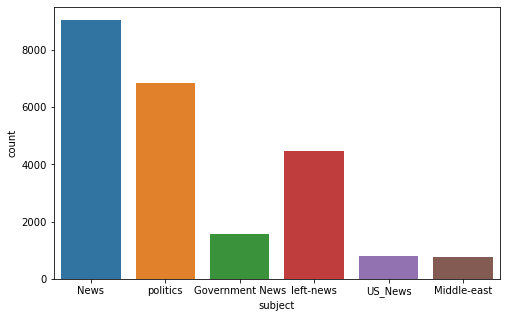

In [15]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.savefig('subject analysis ',dpi=300)

plt.show()

C:\Users\ASUS1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


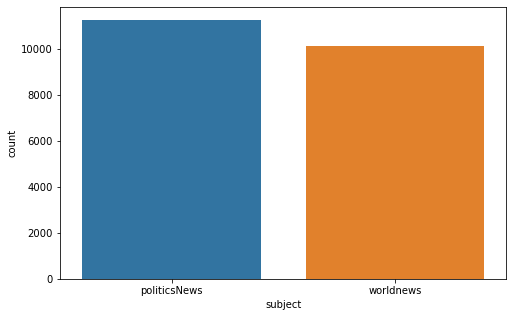

In [16]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=true)
plt.savefig('subject analysis ',dpi=300)

plt.show()

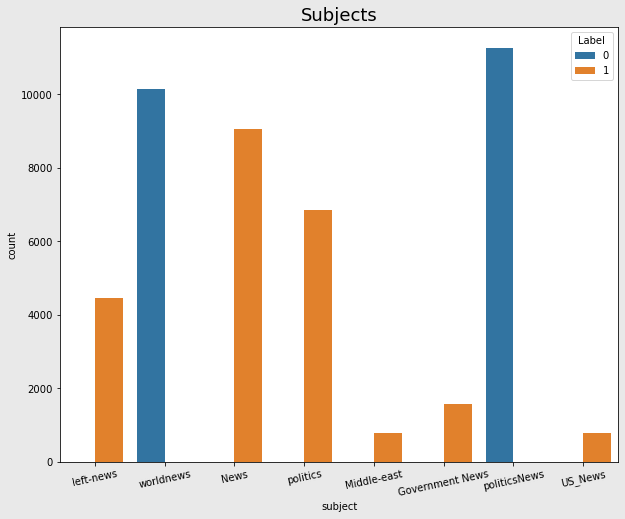

In [17]:
fig=plt.figure(figsize=[10,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.xticks(rotation=12)
plt.title("Subjects",size=18)
sns.countplot(data=news_dataset, x="subject",hue="Label")
plt.savefig('subject fake and real',dpi=300)

# Categorizing word to Real and Fake 

In [18]:
real_words = ''
fake_words = ''
for val in news_dataset[news_dataset['Label']==1].text:
# split the value
    tokens = val.split()
# Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
real_words += " ".join(tokens)+" "
for val in news_dataset[news_dataset['Label']==0].text:
# split the value
    tokens = val.split()
# Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
fake_words += " ".join(tokens)+" "

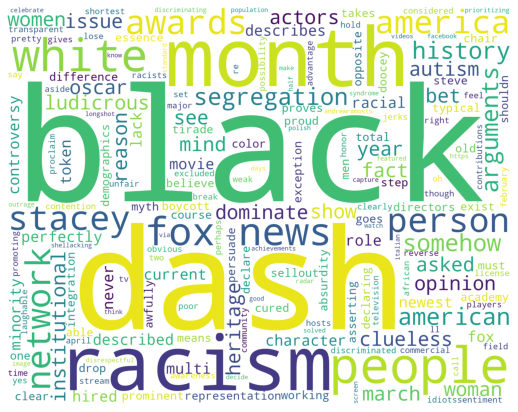

In [19]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1900, height = 1500,
background_color ='white',
stopwords = stopwords,min_font_size = 10).generate(real_words)
# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('real word',dpi=300)
plt.show()

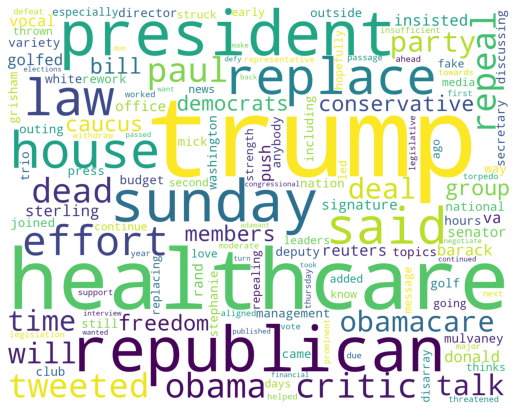

In [20]:
wordcloud = WordCloud(width = 1900, height = 1500,
background_color ='white',
stopwords = stopwords,
min_font_size = 10).generate(fake_words)
# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig(' fake word',dpi=300)
plt.show()

# Fake and Real news time series

In [21]:
fake['date'].value_counts()

May 10, 2017                                                                                46
May 6, 2016                                                                                 44
May 5, 2016                                                                                 44
May 26, 2016                                                                                44
May 11, 2016                                                                                43
                                                                                            ..
November 19, 2017                                                                            1
December 9, 2017                                                                             1
December 11, 2017                                                                            1
November 12, 2017                                                                            1
https://100percentfedup.com/video-hillary-asked-ab

In [22]:
true['date'].value_counts()

December 20, 2017      182
December 6, 2017       166
November 30, 2017      162
November 9, 2017       158
October 13, 2017       155
                      ... 
December 25, 2016        1
September 11, 2016       1
June 24, 2017            1
January 24, 2016         1
August 21, 2016          1
Name: date, Length: 716, dtype: int64

In [23]:
#Removing links and the headline from the date column
fake=fake[~fake.date.str.contains("http")]
fake=fake[~fake.date.str.contains("HOST")]

In [24]:
#Converting the date to datetime format
fake['date'] = pd.to_datetime(fake['date'])
true['date'] = pd.to_datetime(true['date'])

In [25]:
fake=fake.groupby(['date'])['Label'].count()
fake=pd.DataFrame(fake)

In [26]:
true=true.groupby(['date'])['Label'].count()
true=pd.DataFrame(true)

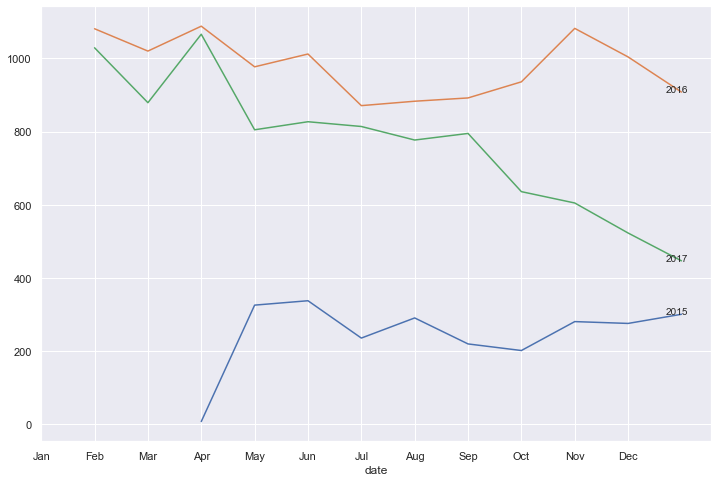

In [27]:
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
ts = fake['Label']

df_plot = ts.groupby([ts.index.month,ts.index.year]).sum().unstack()
df_plot

fig, ax = plt.subplots(figsize=(12,8))
df_plot.plot(ax=ax,legend=False)

# xticks
months = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(12))
ax.set_xticklabels(months)

# plot names in the end
for col in df_plot.columns:
    plt.annotate(col,xy=(plt.xticks()[0][-1]+0.7, df_plot[col].iloc[-1]))
    

plt.savefig('Time series analysis-fake data',dpi=300)

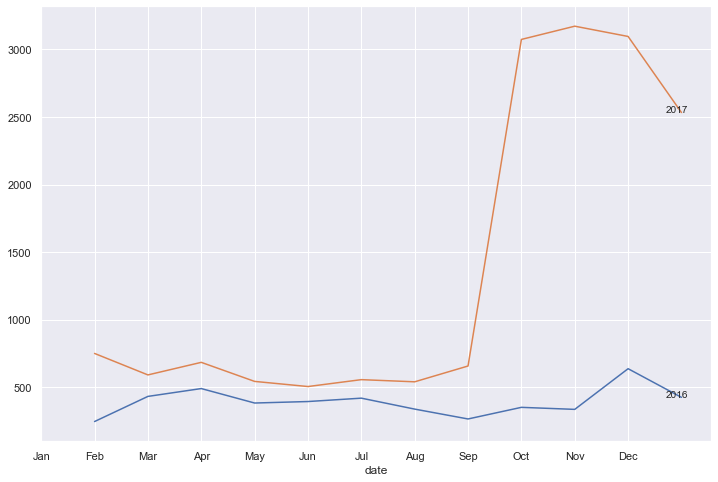

In [28]:
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
ts = true['Label']

df_plot = ts.groupby([ts.index.month,ts.index.year]).sum().unstack()
df_plot

fig, ax = plt.subplots(figsize=(12,8))
df_plot.plot(ax=ax,legend=False)

# xticks
months = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(12))
ax.set_xticklabels(months)

# plot names in the end
for col in df_plot.columns:
    plt.annotate(col,xy=(plt.xticks()[0][-1]+0.7, df_plot[col].iloc[-1]))
    
plt.savefig('Time series analysis- true data',dpi=300)